In [302]:
#pip install wordcloud

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [304]:
# Link do site
Site = 'https://news.google.com/search?for=ucrania&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

# Requisição
Pagina = requests.get( Site )

In [305]:
Coleta = BeautifulSoup( Pagina.text, 'html.parser')

In [306]:
# Buscar
Coleta.title.string



'Google Notícias - Pesquisar'

In [307]:
Coleta.title.name

'title'

In [308]:
Coleta.find( class_='cp7Yvc').string

'Notícias sobre Biden, Lula e Ucrânia'

In [309]:
Coleta.find( class_='cp7Yvc').name

'div'

In [310]:
len( Coleta.find_all('span') )

585

In [311]:
#Solução
def Buscar_Empresas(ticket):
  
  # Criando a URK
  Url = f'https://news.google.com/search?for={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  # Resposta
  Resposta = requests.get( Url )

  # Codigo --> SOAP
  Codigo_HTML = Resposta.text

  # Converter SOAP
  Objeto_Soup = BeautifulSoup( Codigo_HTML, 'html.parser')

  return Objeto_Soup

In [312]:
# Todas as informações
Dados = Buscar_Empresas('guerra_ucrania')

len( Dados )

# Buscando os titulos
Elementos = Dados.find_all('h3')

In [313]:
# Buscando os textos
Noticias = [ Texto.get_text() for Texto in Elementos ]
print('Noticias')
print( len(Noticias) )

Noticias
100


In [314]:
print('***' * 7 )
print('*** Notícias localizadas ***')
print('***' * 7 )

for Numero, Loop in enumerate( Noticias[0:5] ):
  print('--' * 10)
  print( Loop )

*********************
*** Notícias localizadas ***
*********************
--------------------
Mesmo em guerra, Ucrânia manda socorristas à Turquia após terremoto
--------------------
ESPM oferece curso online para jornalistas sobre Um ano da ...
--------------------
Ucrânia troca ministro da Defesa pressionado por suspeita de corrupção em meio à guerra
--------------------
Primeira cimeira da UE num país em guerra. Ucrânia quer juntar-se aos 27 e pede sanções para destruir poder nuclear russo
--------------------
Guerra Ucrânia. Bielorrússia reforça apoio a Moscovo


In [315]:
Concatenar = ''

for Loop in Noticias:
  Quebra = Loop.split()

  for Palavra in Quebra:
    Concatenar = Concatenar + ' ' + Palavra

In [316]:
Concatenar

' Mesmo em guerra, Ucrânia manda socorristas à Turquia após terremoto ESPM oferece curso online para jornalistas sobre Um ano da ... Ucrânia troca ministro da Defesa pressionado por suspeita de corrupção em meio à guerra Primeira cimeira da UE num país em guerra. Ucrânia quer juntar-se aos 27 e pede sanções para destruir poder nuclear russo Guerra Ucrânia. Bielorrússia reforça apoio a Moscovo Guerra: Ucrânia pede envio de caças aos aliados do Ocidente Guerra Ucrânia. Continuam as operações de resgate em Dnipro Guerra/Ucrânia: Rússia anuncia conquista de Soledar Gesto de apoio à Ucrânia. Boris Johnson visita Kiev Guerra. Ucrânia restaurou 55% da sua energia elétrica Guerra. Ucrânia recebe esta semana primeiro montante de apoio da ... “O mundo inteiro ajudou-nos, agora não podemos ficar à margem”. Ucrânia envia 87 operacionais para a Turquia Como um dos países mais pobres da Europa ajudou (secretamente) a salvar a Ucrânia no início da guerra O problema está nos juros ou na agenda econômi

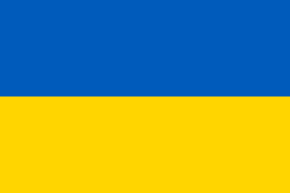

In [317]:
from PIL import Image
Image.open('ucrania.png')

In [318]:
Mascara = np.array( Image.open('ucrania.png') )
Mascara[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

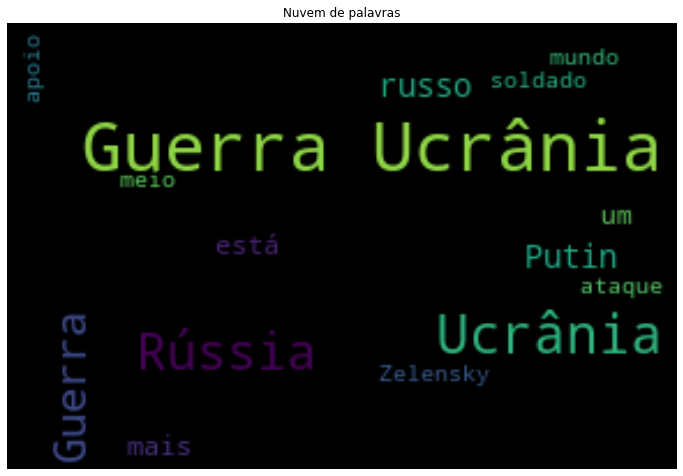

In [319]:
# Criando a nuvem
Nuvem_Palavras = WordCloud(
  width= 1200,
  height= 1000,
  mask=Mascara,
  max_words=100,
  min_font_size=10,
  # Remover palavras
  stopwords=['Americanas', 'o', 'de', 'da', 'em', 'que', 'e', 'a', 'das', 'não', 'dos', 'Veja', 'sobre', 'AMER3', 'é', 'na', 'com', 'Por', 'as', 'os', 'como', 'do', 'para', 'no', 'à', 'R', 'se']
  ).generate( Concatenar )
 
Figura, Eixo = plt.subplots( figsize=(12, 10) )
plt.title('Nuvem de palavras')
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
Eixo.set_axis_off()
plt.savefig('Analise_Nuvem_Palavras.png')